In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
modelling_df = pd.read_csv('Dataset/output_dataset.csv')

In [4]:
# Convert 'country', 'account_currency', and 'Trading_Method' to categorical
modelling_df['country'] = modelling_df['country'].astype('category')
modelling_df['account_currency'] = modelling_df['account_currency'].astype('category')
modelling_df['Trading_Method'] = modelling_df['Trading_Method'].astype('category')

# Convert 'active' column to categorical
modelling_df['active'] = modelling_df['active'].astype('category')

# Drop Total_Trades
modelling_df.drop(['Total_Trades'], axis=1, inplace=True)

In [5]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5725 entries, 0 to 5724
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   login                    5725 non-null   int64   
 1   country                  5725 non-null   category
 2   account_currency         5725 non-null   category
 3   Trading_Frequency        5725 non-null   float64 
 4   Buy_Percentage           5725 non-null   float64 
 5   Average_Volume           5725 non-null   float64 
 6   Average_Volume_USD       5725 non-null   float64 
 7   Average_DPM              5725 non-null   float64 
 8   Unique_Symbols_Traded    5725 non-null   int64   
 9   Peak_Trading_Times       5725 non-null   int64   
 10  Ratio_Profitable_Trades  5725 non-null   float64 
 11  Profit_Loss_Variability  5725 non-null   float64 
 12  Average_Trade_Duration   5725 non-null   float64 
 13  TP/SL Hit Ratio          5725 non-null   float64 
 14  Reward_R

In [6]:
numeric_cols = modelling_df.select_dtypes(include=['int64', 'float64']).columns

# Creating a new DataFrame with only numeric columns
df_numeric = modelling_df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

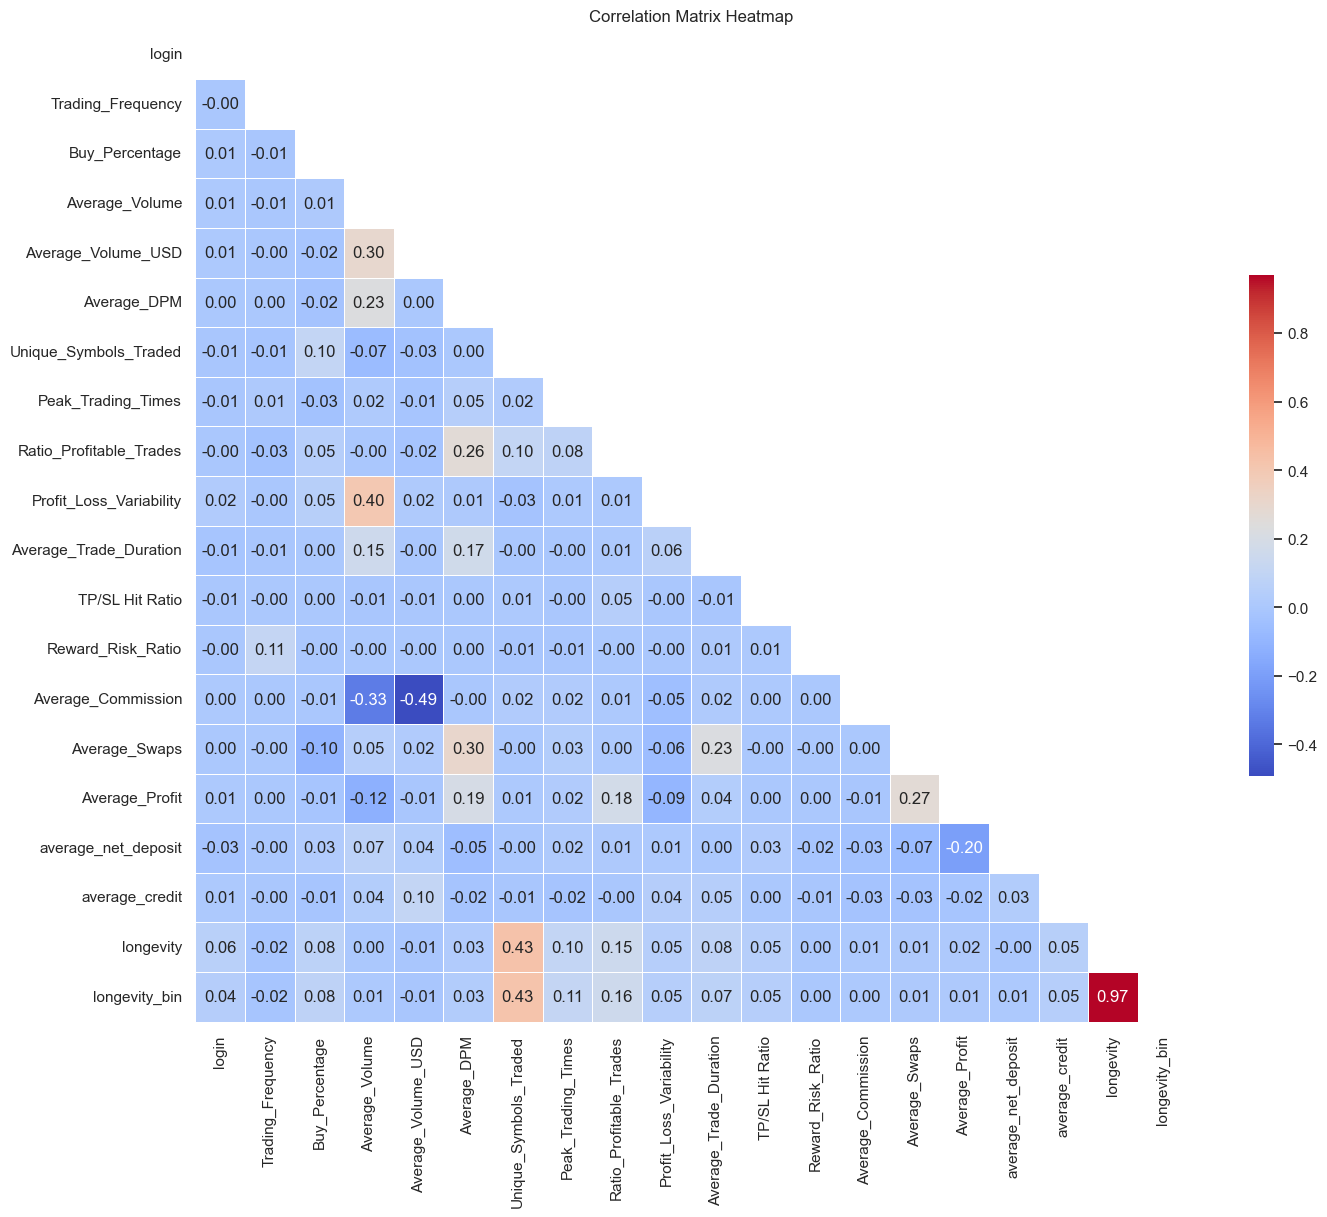

In [7]:
# Setting up the aesthetics for the heatmap
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 13))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
                      square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()